## YC company EXPLORATORY DATA ANALYSIS...

In [144]:
import json
import pandas as pd

# Read JSON file
with open('company_data.json', 'r') as json_file:
    data = json.load(json_file)

# Initialize lists to store flattened data
flattened_data = []

# Flatten the nested structure
for company in data:
    # Check if the company dictionary is not empty and all required keys exist
    if company and all(key in company for key in ['Name', 'Tagline', 'Description', 'Batch', 'Company Type', 
                                                  'Location', 'Website URL', 'Year Founded', 'Team Size', 
                                                  'LinkedIn Profile', 'Industry Tags', 'url']):
        flattened_company = {
            'Name': company.get('Name'),
            'Tagline': company.get('Tagline'),
            'Description': company.get('Description'),
            'Batch': company.get('Batch'),
            'Company Type': company.get('Company Type'),
            'Location': company.get('Location'),
            'Website URL': company.get('Website URL'),
            'Year Founded': company.get('Year Founded'),
            'Team Size': company.get('Team Size'),
            'LinkedIn Profile': company.get('LinkedIn Profile'),
            'Twitter Handle': company.get('Twitter Handle'),
            'Industry Tags': company.get('Industry Tags'),
            'url': company.get('url')
        }

        # Extract founder information
        founders = company.get('Founders', [])
        for i in range(1, 5):
            if i <= len(founders):
                founder = founders[i - 1]
                flattened_company[f'Founder{i}_Name'] = founder.get('Name')
                flattened_company[f'Founder{i}_Role'] = founder.get('Role')
                flattened_company[f'Founder{i}_Biography'] = founder.get('Biography')
                flattened_company[f'Founder{i}_LinkedIn Profile'] = founder.get('LinkedIn Profile')
            else:
                flattened_company[f'Founder{i}_Name'] = None
                flattened_company[f'Founder{i}_Role'] = None
                flattened_company[f'Founder{i}_Biography'] = None
                flattened_company[f'Founder{i}_LinkedIn Profile'] = None

        flattened_data.append(flattened_company)
    else:
        pass

# Convert to DataFrame
df = pd.DataFrame(flattened_data)

# Write DataFrame to CSV file
df.to_csv('company_data.csv', index=False)


it directly flattens the nested structure of the JSON data . It seems like there's an issue with one of the companies where the structure doesn't match what i expect,so, i includes a check to ensure that the company dictionary is not empty (if company) before attempting to access its keys. This should help handle cases where the structure of a company dictionary doesn't match what we expect.

In [145]:
df

,Name,Tagline,Description,Batch,Company Type,Location,Website URL,Year Founded,Team Size,LinkedIn Profile,...,Founder2_Biography,Founder2_LinkedIn Profile,Founder3_Name,Founder3_Role,Founder3_Biography,Founder3_LinkedIn Profile,Founder4_Name,Founder4_Role,Founder4_Biography,Founder4_LinkedIn Profile
0,TrueClaim,Automatically saving self-insured companies 7%...,TrueClaim processes all payments between healt...,W24,Active,Location:San Francisco,https://www.trytrueclaim.com,Founded:2023,Team Size:2,https://linkedin.com/in/rwbayer,...,Co-founder and CTO of TrueClaim (W24). Previou...,https://linkedin.com/in/rwbayer,None,None,None,None,None,None,None,None
1,CoCrafter,B2B construction marketplace to match contract...,CoCrafter is a construction marketplace to mat...,W24,Active,"Location:Munich, Germany",https://cocrafter.com/,Founded:2023,Team Size:3,https://www.linkedin.com/in/annabell-v-86a73b227,...,Building CoCrafter to empower the long-tail co...,https://linkedin.com/in/philipp-rollwage,Annabell V.,None,Building CoCrafter - a construction marketplac...,https://www.linkedin.com/in/annabell-v-86a73b227,None,None,None,None
2,Reform,Retool for logistics companies,Reform makes it easy for logistics companies t...,W24,Active,Location:San Francisco,https://www.reformhq.com,Founded:2023,Team Size:3,https://linkedin.com/in/pradhit,...,Omar is the co-founder and president at Reform...,https://linkedin.com/in/omarabuhashish,Pradhit Gosula,None,Pradhit is co-founder and CTO of Reform. Previ...,https://linkedin.com/in/pradhit,None,None,None,None
3,Piramidal,Foundation Model for the Brain,Get instant diagnosis for the vast majority of...,W24,Active,Location:San Francisco,https://piramidal.ai,Founded:2024,Team Size:2,https://linkedin.com/in/kris-pahuja-a59a905b,...,co-founder and all things product and business...,https://linkedin.com/in/kris-pahuja-a59a905b,None,None,None,None,None,None,None,None
4,Junction Bioscience,AI Hypothesis Engine for Molecular Discovery,Junction Bioscience is building an autonomous ...,W24,Active,Location:San Francisco,https://www.junction.bio/,Founded:2024,Team Size:1,https://linkedin.com/in/brian-petkov-b2a63680,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,Heroku,Enabling developers to build and run applicati...,"Heroku, a Salesforce company and industry pion...",W08,Acquired,Location:San Francisco,http://heroku.com,Founded:2007,Team Size:300,https://www.linkedin.com/in/jameslindenbaum,...,None,None,None,None,None,None,None,None,None,None
4266,RescueTime,Take Back Control of your Time,"RescueTime helps you set boundaries, protect f...",W08,Active,"Location:Seattle, WA",http://rescuetime.com,Founded:2007,Team Size:15,https://www.linkedin.com/in/webwright,...,Product/Design/Growth. Founded RescueTime (YC...,https://www.linkedin.com/in/webwright,None,None,None,None,None,None,None,None
4267,280 North,,280 North is a web application company based o...,W08,Acquired,Location:San Francisco,http://280north.com,Founded:,Team Size:11,https://www.linkedin.com/in/tolmasky,...,None,None,None,None,None,None,None,None,None,None
4268,Omnisio,Edit and enhance online video. Acquired by Goo...,"Omnisio was founded in 2007 by Ryan Junee, Sim...",W08,Acquired,"Location:Atherton, CA",http://omnisio.com,Founded:,Team Size:0,http://www.linkedin.com/in/jfrumar/,...,None,None,None,None,None,None,None,None,None,None


#### INITIAL EXPLORATION

In [146]:
df.head()

,Name,Tagline,Description,Batch,Company Type,Location,Website URL,Year Founded,Team Size,LinkedIn Profile,...,Founder2_Biography,Founder2_LinkedIn Profile,Founder3_Name,Founder3_Role,Founder3_Biography,Founder3_LinkedIn Profile,Founder4_Name,Founder4_Role,Founder4_Biography,Founder4_LinkedIn Profile
0,TrueClaim,Automatically saving self-insured companies 7%...,TrueClaim processes all payments between healt...,W24,Active,Location:San Francisco,https://www.trytrueclaim.com,Founded:2023,Team Size:2,https://linkedin.com/in/rwbayer,...,Co-founder and CTO of TrueClaim (W24). Previou...,https://linkedin.com/in/rwbayer,None,None,None,None,None,None,None,None
1,CoCrafter,B2B construction marketplace to match contract...,CoCrafter is a construction marketplace to mat...,W24,Active,"Location:Munich, Germany",https://cocrafter.com/,Founded:2023,Team Size:3,https://www.linkedin.com/in/annabell-v-86a73b227,...,Building CoCrafter to empower the long-tail co...,https://linkedin.com/in/philipp-rollwage,Annabell V.,None,Building CoCrafter - a construction marketplac...,https://www.linkedin.com/in/annabell-v-86a73b227,None,None,None,None
2,Reform,Retool for logistics companies,Reform makes it easy for logistics companies t...,W24,Active,Location:San Francisco,https://www.reformhq.com,Founded:2023,Team Size:3,https://linkedin.com/in/pradhit,...,Omar is the co-founder and president at Reform...,https://linkedin.com/in/omarabuhashish,Pradhit Gosula,None,Pradhit is co-founder and CTO of Reform. Previ...,https://linkedin.com/in/pradhit,None,None,None,None
3,Piramidal,Foundation Model for the Brain,Get instant diagnosis for the vast majority of...,W24,Active,Location:San Francisco,https://piramidal.ai,Founded:2024,Team Size:2,https://linkedin.com/in/kris-pahuja-a59a905b,...,co-founder and all things product and business...,https://linkedin.com/in/kris-pahuja-a59a905b,None,None,None,None,None,None,None,None
4,Junction Bioscience,AI Hypothesis Engine for Molecular Discovery,Junction Bioscience is building an autonomous ...,W24,Active,Location:San Francisco,https://www.junction.bio/,Founded:2024,Team Size:1,https://linkedin.com/in/brian-petkov-b2a63680,...,None,None,None,None,None,None,None,None,None,None


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4270 entries, 0 to 4269
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Name                       4270 non-null   object
 1   Tagline                    4270 non-null   object
 2   Description                4270 non-null   object
 3   Batch                      4270 non-null   object
 4   Company Type               4270 non-null   object
 5   Location                   4270 non-null   object
 6   Website URL                4270 non-null   object
 7   Year Founded               4270 non-null   object
 8   Team Size                  4270 non-null   object
 9   LinkedIn Profile           4270 non-null   object
 10  Twitter Handle             3026 non-null   object
 11  Industry Tags              0 non-null      object
 12  url                        4270 non-null   object
 13  Founder1_Name              3094 non-null   object
 14  Founder1

In [148]:
df.shape

(4270, 29)

In [149]:
df.columns

Index(['Name', 'Tagline', 'Description', 'Batch', 'Company Type', 'Location',
       'Website URL', 'Year Founded', 'Team Size', 'LinkedIn Profile',
       'Twitter Handle', 'Industry Tags', 'url', 'Founder1_Name',
       'Founder1_Role', 'Founder1_Biography', 'Founder1_LinkedIn Profile',
       'Founder2_Name', 'Founder2_Role', 'Founder2_Biography',
       'Founder2_LinkedIn Profile', 'Founder3_Name', 'Founder3_Role',
       'Founder3_Biography', 'Founder3_LinkedIn Profile', 'Founder4_Name',
       'Founder4_Role', 'Founder4_Biography', 'Founder4_LinkedIn Profile'],
      dtype='object')

after initial exploration i can see that there so much missing data which consists of 29 columns ..so there is a need for data cleaning..

#### DATA CLEANING


In [150]:
df.duplicated().sum()   #checking if there is any duplicates

0

In [151]:
df.isnull().sum()

Name                            0
Tagline                         0
Description                     0
Batch                           0
Company Type                    0
Location                        0
Website URL                     0
Year Founded                    0
Team Size                       0
LinkedIn Profile                0
Twitter Handle               1244
Industry Tags                4270
url                             0
Founder1_Name                1176
Founder1_Role                3863
Founder1_Biography           1176
Founder1_LinkedIn Profile    1219
Founder2_Name                1779
Founder2_Role                4099
Founder2_Biography           1779
Founder2_LinkedIn Profile    1843
Founder3_Name                3536
Founder3_Role                4216
Founder3_Biography           3536
Founder3_LinkedIn Profile    3572
Founder4_Name                4147
Founder4_Role                4263
Founder4_Biography           4147
Founder4_LinkedIn Profile    4156
dtype: int64

In [152]:
df.drop(['Industry Tags','Founder1_Name','Founder3_Name','Founder3_Role','Founder3_Biography','Founder3_LinkedIn Profile',
         'Founder4_Name','Founder4_Role','Founder4_Biography','Founder4_LinkedIn Profile','Founder1_Role','Founder1_Biography','Founder1_LinkedIn Profile'
        ,'Founder2_Name','Founder2_Role','Founder2_Biography','Founder2_LinkedIn Profile'], axis=1, inplace=True)   #removing unnecessary columns

In [153]:
df.drop(['url','Website URL'],axis=1, inplace=True)

In [154]:
df.columns

Index(['Name', 'Tagline', 'Description', 'Batch', 'Company Type', 'Location',
       'Year Founded', 'Team Size', 'LinkedIn Profile', 'Twitter Handle'],
      dtype='object')

In [155]:
# Define the default value for Twitter handles
default_twitter_handle = 'Not Available'

# Replace null values in 'Twitter Handle' column with the default value
df['Twitter Handle'].fillna(default_twitter_handle, inplace=True)


In [156]:
df.isnull().sum()

Name                0
Tagline             0
Description         0
Batch               0
Company Type        0
Location            0
Year Founded        0
Team Size           0
LinkedIn Profile    0
Twitter Handle      0
dtype: int64

In [157]:
#cleaning team size column to extract only numerical values
df['Year Founded'] = df['Year Founded'].str.extract(r'Founded:\s*(\d+)', expand=False).astype(float)

In [158]:
# Convert 'Year Founded' to datetime
df['Year Founded'] = pd.to_datetime(df['Year Founded'], format='%Y')

In [159]:
#cleaning team size column to extract only numerical values
df['Team Size'] = df['Team Size'].str.extract(r'Team Size:\s*(\d+)', expand=False).astype(float)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4270 entries, 0 to 4269
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              4270 non-null   object        
 1   Tagline           4270 non-null   object        
 2   Description       4270 non-null   object        
 3   Batch             4270 non-null   object        
 4   Company Type      4270 non-null   object        
 5   Location          4270 non-null   object        
 6   Year Founded      3354 non-null   datetime64[ns]
 7   Team Size         4204 non-null   float64       
 8   LinkedIn Profile  4270 non-null   object        
 9   Twitter Handle    4270 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 333.7+ KB


#### VISUALIZATIONS

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
#univarite analysis

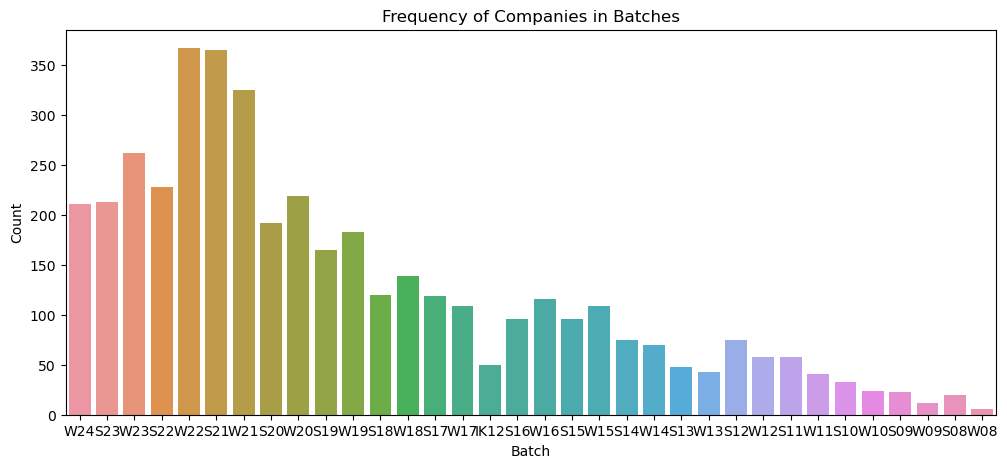

In [163]:
# BATCH
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Batch')
plt.title('Frequency of Companies in Batches')
plt.xlabel('Batch')
plt.ylabel('Count')
plt.show()

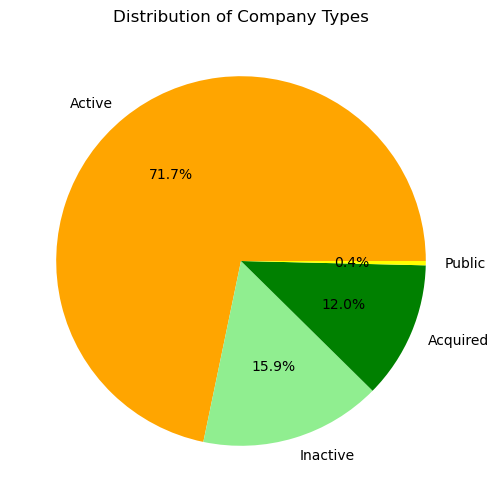

In [164]:
# Company Type
plt.figure(figsize=(6, 6))
df['Company Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'lightgreen','green','yellow'])
plt.title('Distribution of Company Types')
plt.ylabel('')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


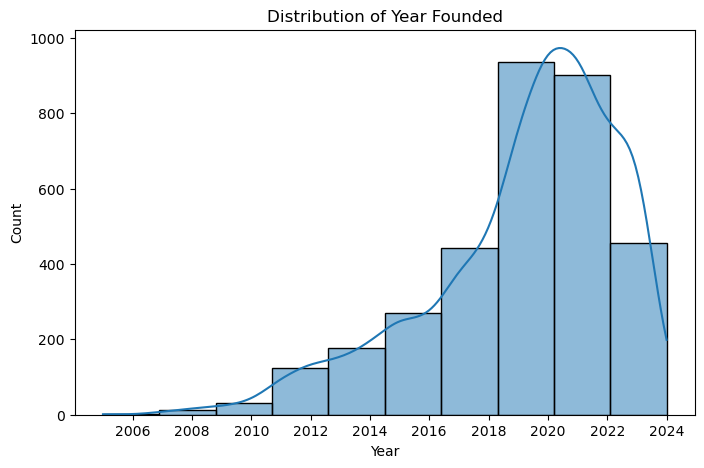

In [165]:
# Year Founded
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Year Founded', bins=10, kde=True)
plt.title('Distribution of Year Founded')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In the period of 2018-2022, there is large number of companies started..

In [166]:
# Bivariate analysis

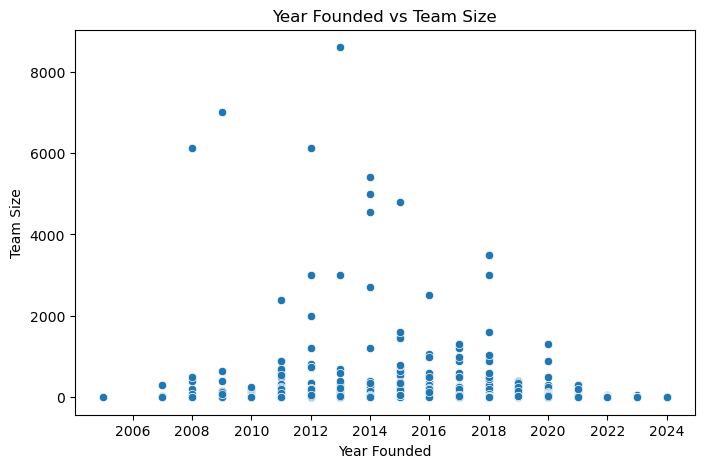

In [167]:
# Scatter plot for Year Founded vs Team Size
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Year Founded', y='Team Size')
plt.title('Year Founded vs Team Size')
plt.xlabel('Year Founded')
plt.ylabel('Team Size')
plt.show()

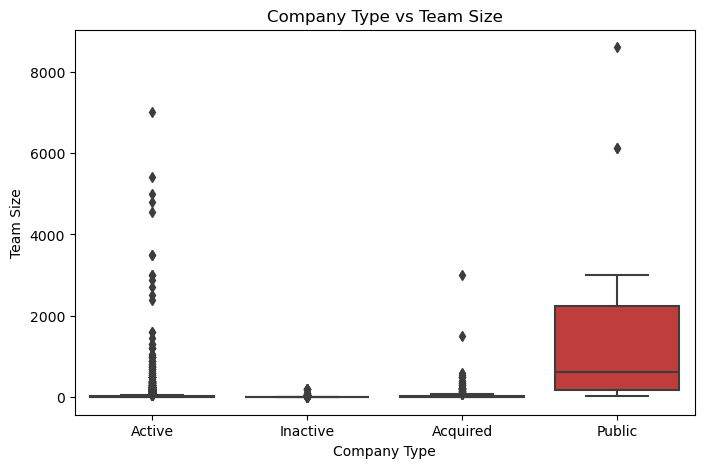

In [168]:
# Box plot for Company Type vs Team Size
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Company Type', y='Team Size')
plt.title('Company Type vs Team Size')
plt.xlabel('Company Type')
plt.ylabel('Team Size')
plt.show()

it indicate that companies in the 'Public' category tend to have larger or more defined team sizes compared to others.
This could imply differences in organizational structure, resources, or business models between publicly traded companies and other types of companies.

In [169]:
# Correlation Analysis

In [170]:
# Calculate correlation matrix
correlation_matrix = df[['Year Founded', 'Team Size']].corr()
print(correlation_matrix)

              Year Founded  Team Size
Year Founded      1.000000   0.038039
Team Size         0.038039   1.000000


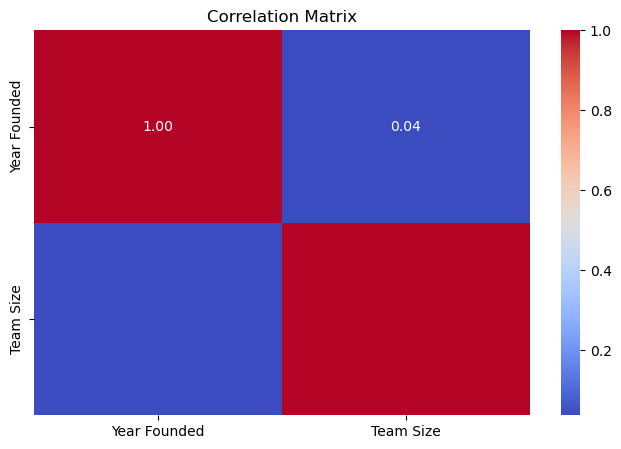

In [171]:
# Heatmap for correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation coefficient of approximately 0.038 suggests a very weak positive correlation between the year a company was founded and its team size.
This weak correlation indicates that there is little to no linear relationship between the year a company was founded and its team size.